In [1]:

import numpy as np # For numerical computation
import pandas as pd # Data manipulation
import seaborn as sns # plotting
import scipy.io # reading matlab files in python
from scipy import signal #signal processing
from scipy.fftpack import fft, dct #signal processing

from sklearn.linear_model import LinearRegression #linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt # For plotting graphs(Visualization)


In [7]:
sample_file = scipy.io.loadmat(f'../data/part_1.mat')['p']
print(f'sample_file Data type: {type(sample_file)}')


sample_file Data type: <class 'numpy.ndarray'>


In [8]:
unseen_temp_mat = sample_file[0, 999]
unseen_temp_length = unseen_temp_mat.shape[1]
sample_size = 125

In [9]:
sample_size = 125
ppg_2 = []
for i in range(1000):
    temp_mat = sample_file[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
        ppg_2.append(temp_ppg)

In [10]:
ecg_2 = []
bp_2 = []
sbp_2 = [] #Systolic Blood Pressure
dbp_2 = [] #Diastolic Blood Pressue
size = 125 #sample size

for i in range(1000):
    temp_mat = sample_file[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ecg = temp_mat[2, j*size:(j+1)*size]
        temp_bp = temp_mat[1, j*size:(j+1)*size]
        
        max_value = max(temp_bp)
        min_value = min(temp_bp)
        
        sbp_2.append(max_value)
        dbp_2.append(min_value)
        ecg_2.append(temp_ecg)
        bp_2.append(temp_bp)

In [11]:
ppg_2, ecg_2, bp_2 = np.array(ppg_2).reshape(-1,1), np.array(ecg_2).reshape(-1,1), np.array(bp_2).reshape(-1,1)
sbp_2, dbp_2 = np.array(sbp_2).reshape(-1,1), np.array(dbp_2).reshape(-1,1)
print(f'PPG_shape: {ppg_2.shape}\n ECG_shape: {ecg_2.shape}\n BP_shape: {bp_2.shape}')
print(f'Systolic-BP_shape: {sbp_2.shape},\n Diastolic-BP_shape: {dbp_2.shape}')

PPG_shape: (32061000, 1)
 ECG_shape: (32061000, 1)
 BP_shape: (32061000, 1)
Systolic-BP_shape: (256488, 1),
 Diastolic-BP_shape: (256488, 1)


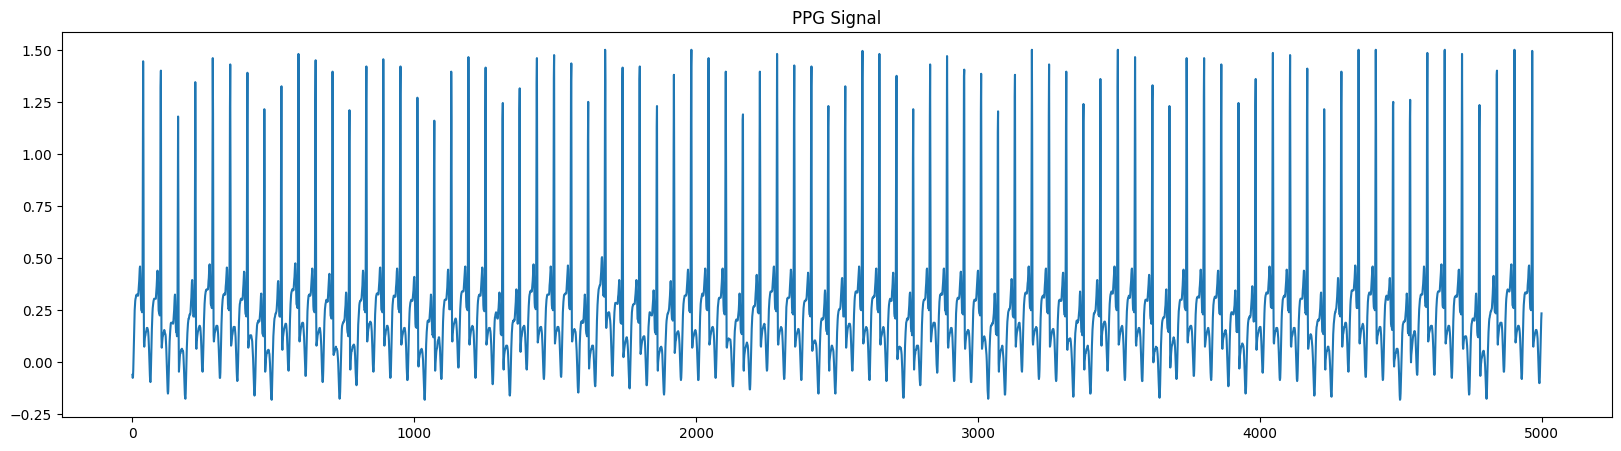

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(ecg_2[:5000])
plt.title('PPG Signal')
plt.show()


In [1]:
fs = 100
import scipy.signal as sgnl

In [21]:
[b_ppt, a_ppt] = sgnl.butter(1, [(0.1 * 2) / fs, (5 * 2) / fs], 'band')
[b_ecg, a_ecg] = sgnl.butter(2, [(1 * 2) / fs, (35 * 2) / fs], 'band')


In [22]:
b_ecg

array([ 0.48083843,  0.        , -0.96167686,  0.        ,  0.48083843])

In [23]:
a_ecg

array([ 1.        , -1.17455937, -0.21696622,  0.14704836,  0.25232463])

In [15]:
b_ppt

array([ 0.13432327,  0.        , -0.13432327])

In [16]:
a_ppt

array([ 1.        , -1.72963133,  0.73135345])